# Predicting Hosing Prices with Housing Data

## Frame the problem
* **What is the business objective?** - Determine hosuing price to use in another model to determine where to invest
* **What does the current solution look like?** - Experts manually get the data and use complex rules to estimate median price

## Selecting what type of problem
* **Supervised** - We will give the model labeled data
* **Univariate, Multiple Regression** - We are training a model to take multiple features and regress to a single value

## Selecting a performance measure
### **Root Mean Square Error** - a typical performance measue that tells how much of an error a system made, large weight indicating larger error

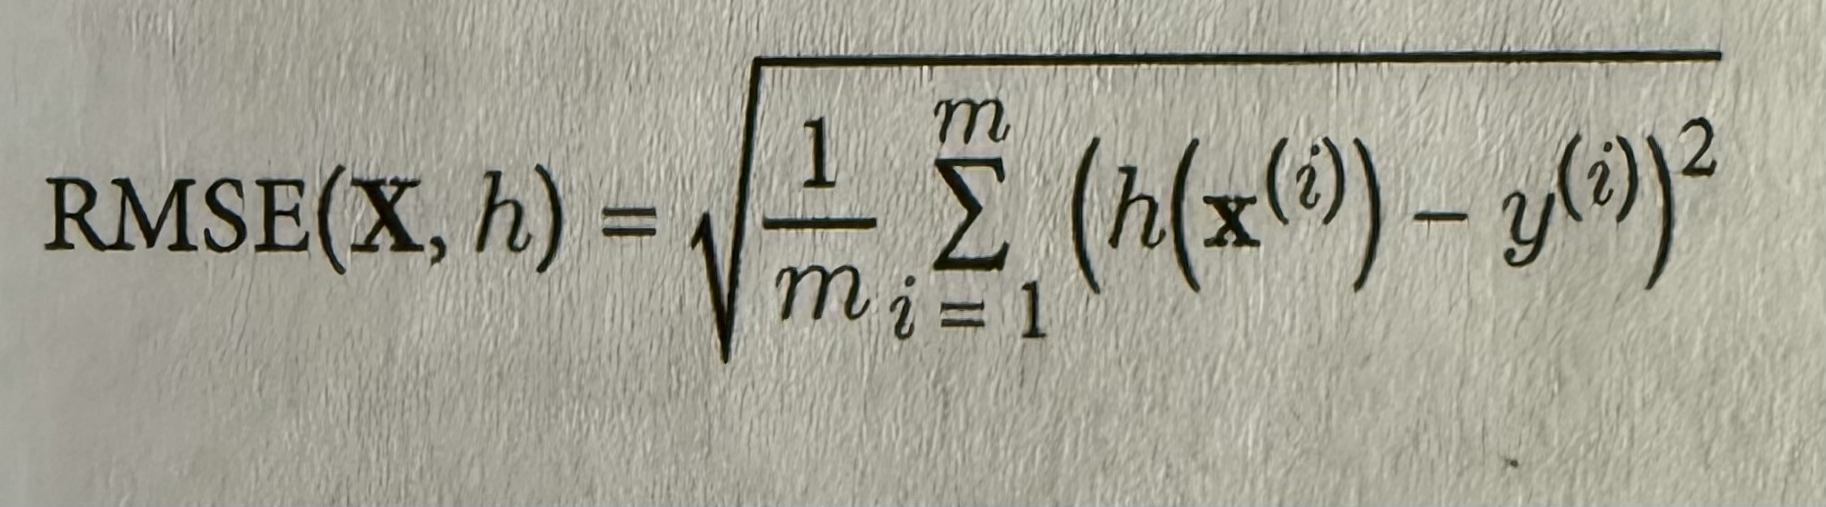

In [2]:
from IPython.display import Image
Image(filename='RMSE.png') 

* **m** - the number of instances in the dataset you are measuring the RMSE on
* **x^(i)** - the vector of all the feature values (excluding the label) of the ith instance
* **y^(i)** - the label or desired output of the ith instance
* **X** - The matrix containing all features, excluding labels. 
```
X = |(x^(1))^T| = (-118.29 33.91 1416 38372)
    |(x^(2))^T|        .      .    .    . 
         ...           .      .    .    .
    |(x^(m))^T|        .      .    .    .
```

* **h** - The systems prediction function, also called hypothesis (also is y-hat).
ie if system predicts output is 200,000 = y-hat^(1) = h(x^1), error is y-hat^1 - y^1
* **RMSE(X,h)** - the cost function measured on the set of examples using your hypothesis h

### **Mean Absolute Error** - Good for when their are many outliers

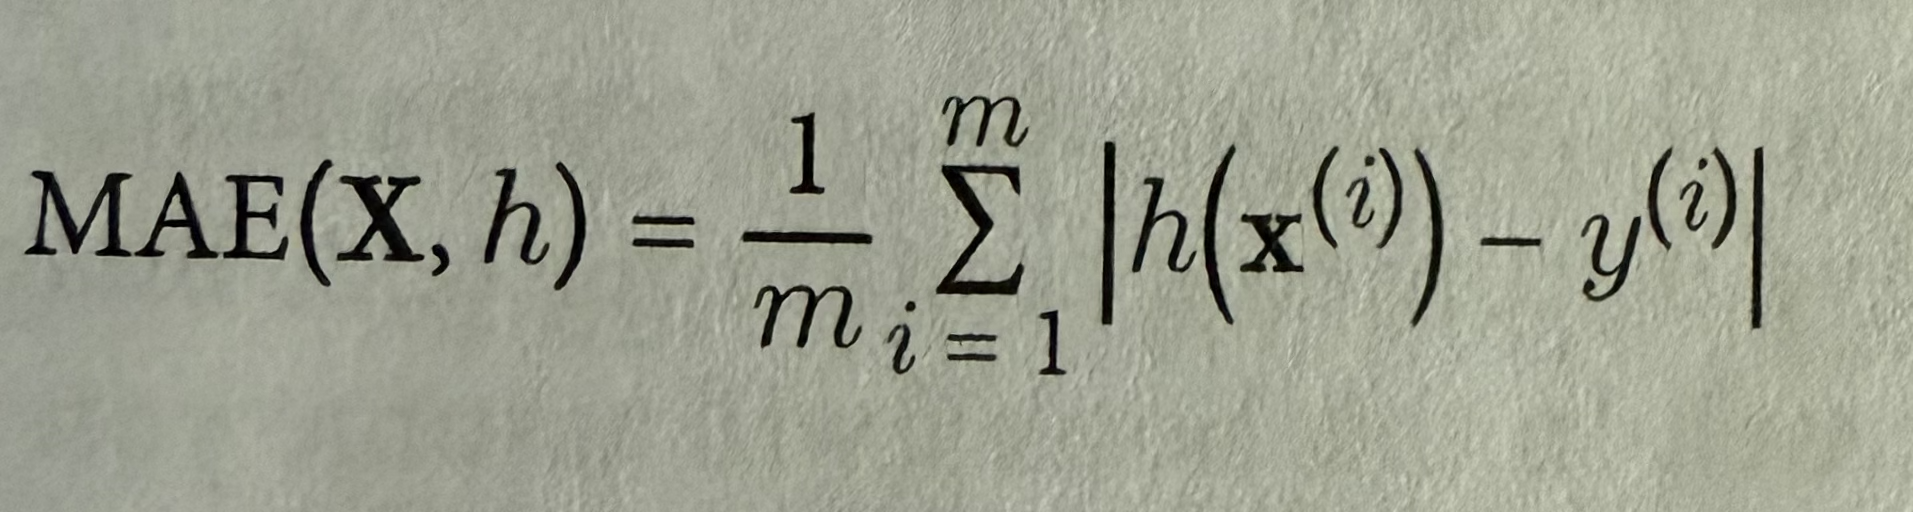

In [3]:
from IPython.display import Image
Image(filename='MAE.png') 

## Check the Assumptions

* list and verify all assumptions you have made
* for example - make sure the output of your model should be a certain format and type ie price not high, med, low

## Getting the data

In [4]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [5]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* 20640 is small for ML standards, but ok for now.  
* total_bedrooms has null
* ocean_proximity is object type, so any python object but since from csv is text-based

In [7]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

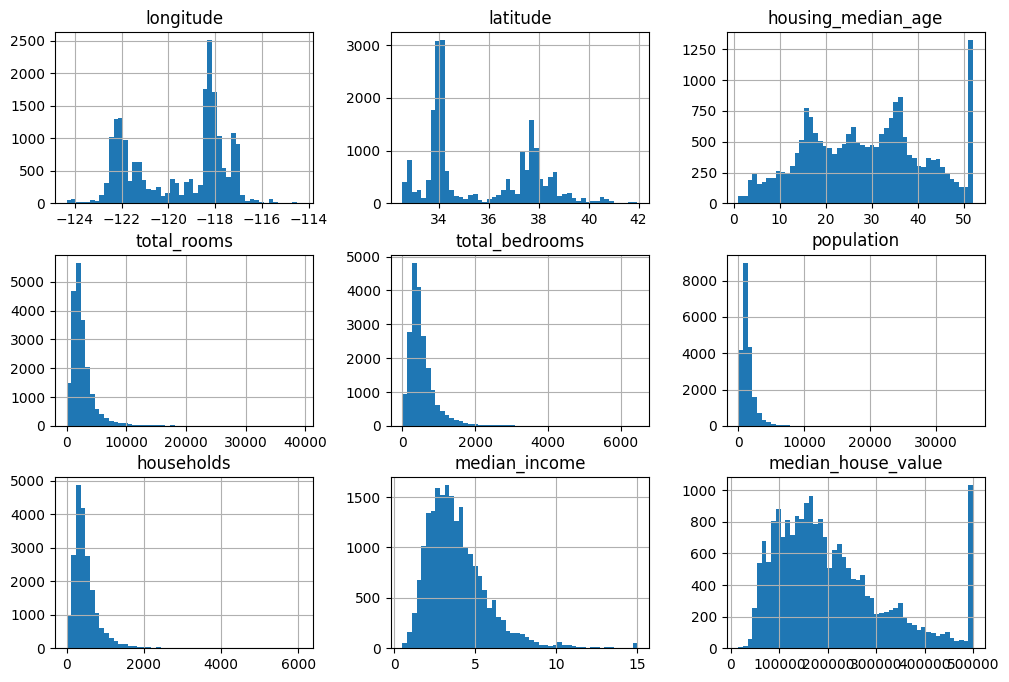

In [9]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(12,8))
plt.show()

* median income doesnt look like USD - it represents 10s of thousands of dollars, capped at 15 and 0.5
* median age and median house value are also capped, house value may cause issues later as it is the target attribute
If you have to predict where values will be more than whats capped, either get more data that has higher labels, or remove from the testing and training set
* Attributes have very different scales
* Many of the histograms are skewed right.  ML algos may have trouble unless we fix

## Create a test set

In [10]:
# Select 20% of data and set aside for testing (if data set is larger use less)
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set)

16512

In [12]:
len(test_set)

4128

* the issue with above is that we may want to regenerate test and train but this will give different results each time
* we can resolve this by setting random seed, this will still fail on a new or updated dataset
* can use hashes to make sure data isnt in training set

In [13]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[-in_test_set], data.loc[in_test_set]

In [14]:
housing_with_id = housing.reset_index() # adds an index column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

* if we use row index as unique identifier, make sure new data gets appended to the end of the dataset
and nothing ever gets deleted
* if this is not possible, use most stabe features to build unique identifier
* latitude and long are stable so could combine for ID

In [15]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

* scikit learn has functions to split into multiple subsets
* train_test_split()
* shuffle_and_split()

In [16]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

* since this data is small, random splits may introduce bias
* we can do a stratified sample to get even distribution of median_incom

In [17]:
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1,2,3,4,5])

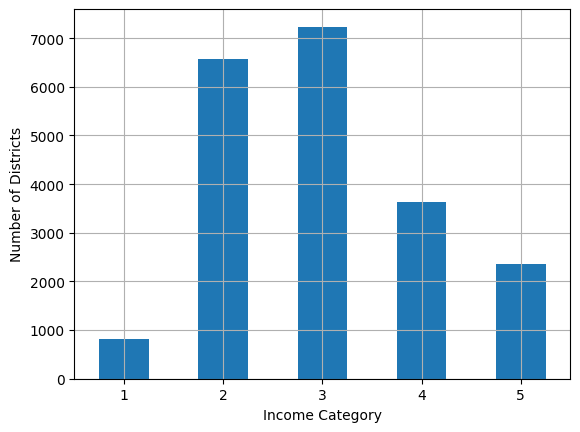

In [18]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income Category")
plt.ylabel("Number of Districts")
plt.show()

In [19]:
# Create multiple splits to further evaluate performance of the model
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [20]:
# grab first split set
strat_train_set, strat_test_set = strat_splits[0]

In [21]:
# or use scikit-learn entirely to get splits
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42
)

In [22]:
# check how it is split
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [23]:
# we wont use income_cat again so can go ahead and delete
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Explore and Visualize the data

* Explore and manipulate only the training set
* process on a sample of the training set if it is large

In [24]:
housing = strat_train_set.copy()

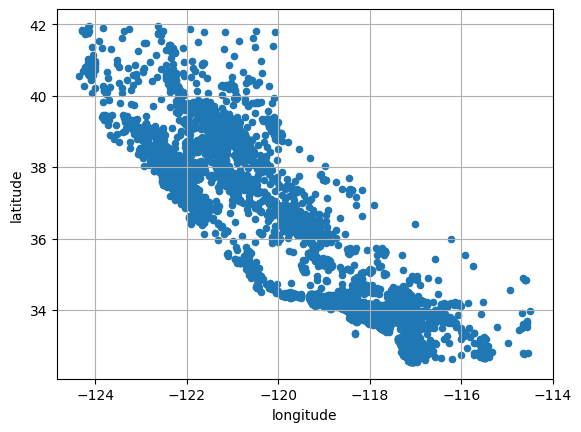

In [25]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

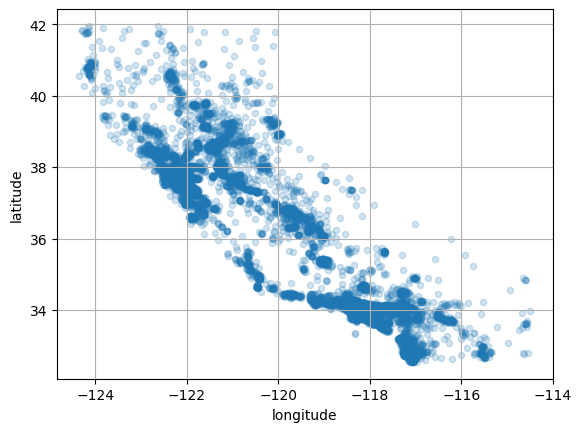

In [26]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

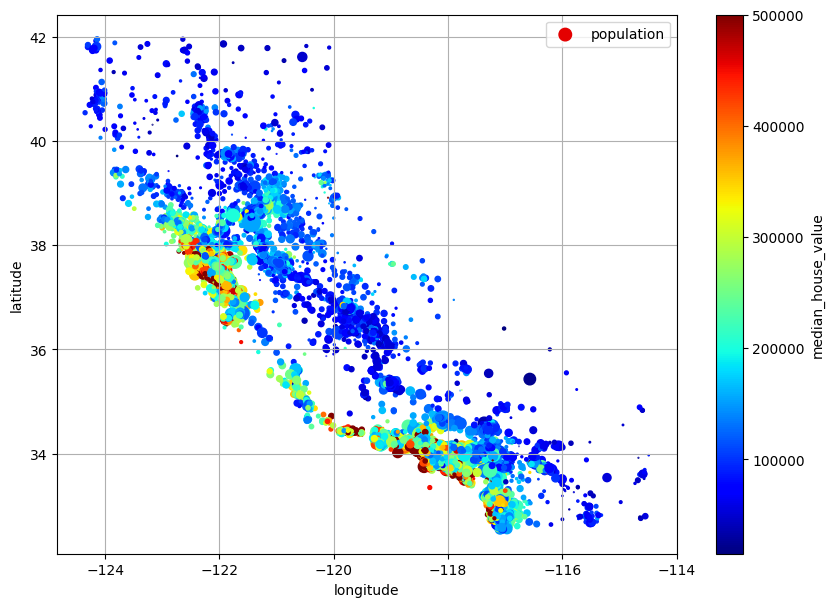

In [27]:
housing.plot(
    kind="scatter", 
    x="longitude", 
    y="latitude", 
    grid=True,
    s=housing["population"] / 100, # radius of circle = population
    label="population",
    c="median_house_value",
    cmap="jet", # blue is lower price, red is higher
    colorbar=True,
    legend=True,
    sharex=False,
    figsize=(10, 7)
)
plt.show()

* we can see housing price is related to location and density
* a clustering algorithm can be useful for detecting the main clusters and for adding
new features that measure proximity to cluster centers
* since data is small we can calculate standard correlation coefficient (Pearsons' r) between pairs of attributes

In [28]:
corr_matrix = housing.corr(numeric_only=True)

In [29]:
# we can see how attributes are correlated to median house value
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

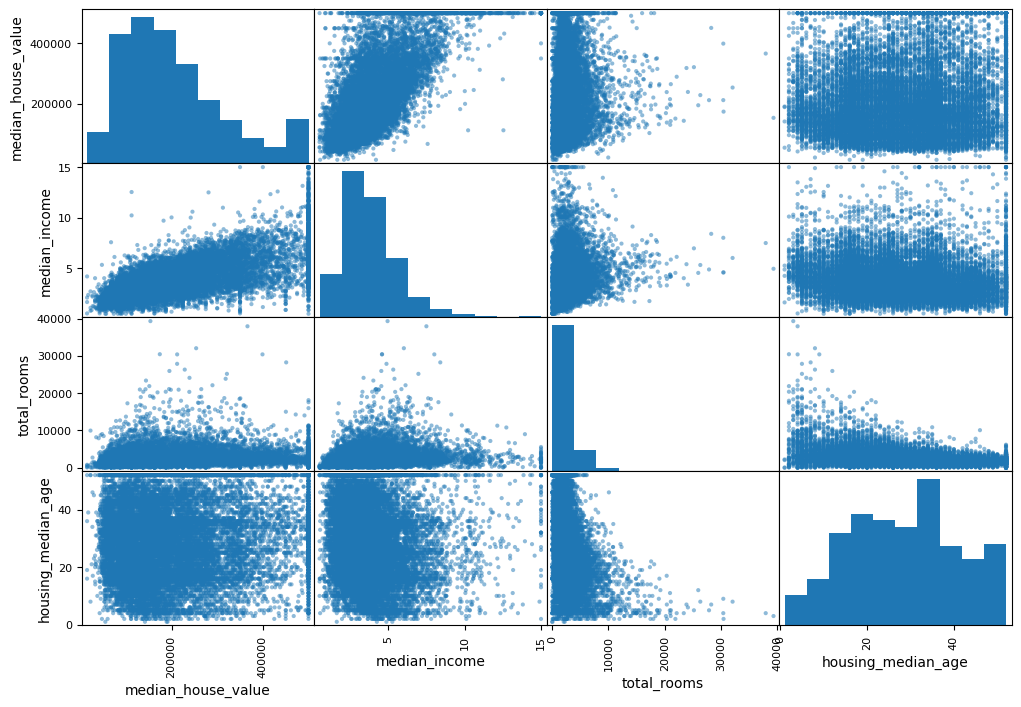

In [30]:
# Another way of finding correlation using pandas
from pandas.plotting import scatter_matrix
attributes = [
    "median_house_value",
    "median_income",
    "total_rooms",
    "housing_median_age"
]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

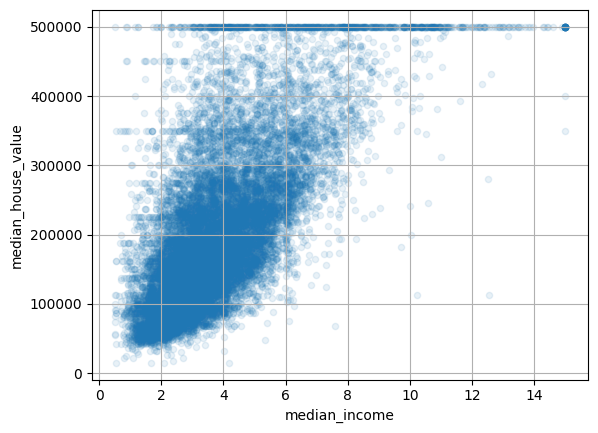

In [31]:
# median_house_value and median_income seem most correlated
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True)
plt.show()

* above we can see strong correlation between house value and income
* we see at $500K the data being capped
* We also see a few other straight lines like at 450K, 350K, and 280K
* It may be good to remove these irregularities when training

## Notes
* correlation coeeficient only measures linear correlations (x goes up, y goes up etc)
* data can be correlated but not linearly, see https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

## Adding new attribues

In [32]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [33]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

In [34]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [35]:
# cleaning the data
# most ML algs cant handle missing data
# 1 - drop districts with missing data
# 2 - drop attributes with missing data
# 3 - fill missing values with 0 or mean etc
null_rows_idx = housing.isnull().any(axis=1)
housing.loc[null_rows_idx].head()


housing_option1 = housing.copy()
housing_option1.dropna(subset=["total_bedrooms"], inplace=True)  # option 1
housing_option1.loc[null_rows_idx].head()

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity]
Index: []

In [36]:
housing_option2 = housing.copy()
housing_option2.drop("total_bedrooms", axis=1, inplace=True)  # option 2
housing_option2.loc[null_rows_idx].head()

longitude  latitude  housing_median_age  total_rooms  population  \
14452    -120.67     40.50                15.0       5343.0      2503.0   
18217    -117.96     34.03                35.0       2093.0      1755.0   
11889    -118.05     34.04                33.0       1348.0      1098.0   
20325    -118.88     34.17                15.0       4260.0      1701.0   
14360    -117.87     33.62                 8.0       1266.0       375.0   

       households  median_income ocean_proximity  
14452       902.0         3.5962          INLAND  
18217       403.0         3.4115       <1H OCEAN  
11889       257.0         4.2917       <1H OCEAN  
20325       669.0         5.1033       <1H OCEAN  
14360       183.0         9.8020       <1H OCEAN

In [37]:
housing_option3 = housing.copy()
median = housing["total_bedrooms"].median()
housing_option3["total_bedrooms"].fillna(median, inplace=True)  # option 3
housing_option3.loc[null_rows_idx].head()

/tmp/ipykernel_88/467514757.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_option3["total_bedrooms"].fillna(median, inplace=True)  # option 3


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14452    -120.67     40.50                15.0       5343.0           434.0   
18217    -117.96     34.03                35.0       2093.0           434.0   
11889    -118.05     34.04                33.0       1348.0           434.0   
20325    -118.88     34.17                15.0       4260.0           434.0   
14360    -117.87     33.62                 8.0       1266.0           434.0   

       population  households  median_income ocean_proximity  
14452      2503.0       902.0         3.5962          INLAND  
18217      1755.0       403.0         3.4115       <1H OCEAN  
11889      1098.0       257.0         4.2917       <1H OCEAN  
20325      1701.0       669.0         5.1033       <1H OCEAN  
14360       375.0       183.0         9.8020       <1H OCEAN

In [38]:
# using imputer instead of median for option 3
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

# median only works for numeric fields
housing_num = housing.select_dtypes(include=[np.number])

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [39]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [40]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [41]:
# use imputed values for training
X = imputer.transform(housing_num)

* you can also use more things like most_frequent or mean, 
* also there are more powerful imputers like KNNImputer and IterativeImputer

In [42]:
# Turn X from numpy matrix to dataframe
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   

       population  households  median_income  
13096      1576.0      1034.0         2.0987  
14973       666.0       357.0         6.0876  
3785        562.0       203.0         2.4330  
14689      1845.0       780.0         2.2618  
20507      1912.0      1172.0         3.5292

### Handling Text and Categorical Attributes

In [43]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

ocean_proximity
13096        NEAR BAY
14973       <1H OCEAN
3785           INLAND
14689          INLAND
20507      NEAR OCEAN
1286           INLAND
18078       <1H OCEAN
4396         NEAR BAY

In [44]:
# Convert the categorical attribute to numbers
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [45]:
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [46]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

* Encoding using Ordinal Encoders like above will lead ML models to think close values are related
* This can be problematic, we can use **ONE HOT ENCODING** Instead
* Create column for each categorie, set value to 1 if true, 0 if false etc. 

In [47]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [48]:
# output is scipy sparse matrix by default
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

* Sparse matrix are very efficient representation for matrices that contain mostly zeros
* if there are many categories, each row has tons of 0s except a single 1, sparse matrix
simplify this and save spase
* they can be interacted with like a 2D array or converted when necessary

In [49]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], shape=(16512, 5))

In [50]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [51]:
# pandas get_dummies() also converts categorical features to one-hot representation
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

ocean_proximity_INLAND  ocean_proximity_NEAR BAY
0                    True                     False
1                   False                      True

In [52]:
# OneHotEncoder is better for production because it remembers everything it was prev trained on
# (still remembers categories from above)
cat_encoder.transform(df_test).toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [53]:
# Pandas will just work on any new unknown category (in production this may not be disireable)
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "NEAR BAY"]})
pd.get_dummies(df_test_unknown)

ocean_proximity_<2H OCEAN  ocean_proximity_NEAR BAY
0                       True                     False
1                      False                      True

In [54]:
# OneHotEncoder will raise error is unknown is added, unless specified
cat_encoder.handle_unknown = "ignore" # any new category isnt added, just will have 0 for all other cats
cat_encoder.transform(df_test_unknown).toarray()

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

* If there are lots of categorical columns, one hot encoding may not perform
* May be better to convert to actual numbers ie Miles to ocean etc
* Or use other encoding methods

In [55]:
# the encoder stores alot of information and ensures col names stay the same
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [56]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

### Feature Scaling and Transformation

* ml algs dont perform well if features have different scales
* Number of rooms goes from 6 to 39320 while median income ranges from 0 to 15
* Can use min-max scaling or standardization
* Never scale on data other then the training set

In [57]:
# min-max scaling is taking the data turning it to be between 0 and 1
# min_max_val  = val - min / (max - min)
# minmaxscaler can take feature range if 0,1 isnt good (-1,1) is better for neural networks

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)
housing_num_min_max_scaled

array([[-0.60851927,  0.11702128,  1.        , ..., -0.80701754,
        -0.61433638, -0.7794789 ],
       [ 0.21095335, -0.66170213,  0.52941176, ..., -0.91866029,
        -0.86708979, -0.22929339],
       [-0.51926978,  0.23617021,  0.25490196, ..., -0.93141946,
        -0.92458466, -0.73336919],
       ...,
       [ 0.47870183, -0.99148936, -0.52941176, ..., -0.65513434,
        -0.71663244, -0.50873781],
       [ 0.20689655, -0.6787234 ,  0.41176471, ..., -0.78873758,
        -0.68751167, -0.49716556],
       [-0.60649087,  0.08723404,  0.68627451, ..., -0.91669734,
        -0.92122457, -0.61608805]], shape=(16512, 8))

In [58]:
# standardization_val = val - mean_val / std_dev
# does not restrict values to certain range
# Much less effected by outliers
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)
housing_num_std_scaled

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.13746004,
         1.39481249, -0.93649149],
       [ 0.59639445, -0.702103  ,  0.90762971, ..., -0.69377062,
        -0.37348471,  1.17194198],
       [-1.2030985 ,  1.27611874,  0.35142777, ..., -0.78876841,
        -0.77572662, -0.75978881],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  1.26829911,
         0.67913534,  0.1010487 ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.27356264,
         0.88286825,  0.14539615],
       [-1.41803793,  0.94797769,  1.22545939, ..., -0.67915557,
        -0.75221898, -0.31034135]], shape=(16512, 8))

* if data is very skewed, **heavy tailed**, both min-max and standardization will crush the values into a small range
* first, transform and shrink the heavy tail to make the data roughly symetrical
* if positive features have heavy tail to the right, take the sqrt
* if the feature has a long and have tail, take the logarithm (**power law distribution**)

In [59]:
# population follows power law distribuiton in this case

* Can also bucket the data
* Make ranges of equal size
* instead of using the feature value, use the index of the bucket
* If the data is multimodal (multiple peaks), can bucket the data, but dont use bucket index.  Use one hot encoding on bucket index

#### Radial Basis Function (RBF)
* Another approach for multimodal data is to add a feature for each mode (peak) representing similarity between feature and that particular mode
* similarity measure most used is RBF
* Gaussian RBF - housing age (x) and 35 is given by exp(-gamma(x-35)^2)
* gamma determines how quickly the similarity measure decays as x moves away

In [60]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]], shape=(16512, 1))

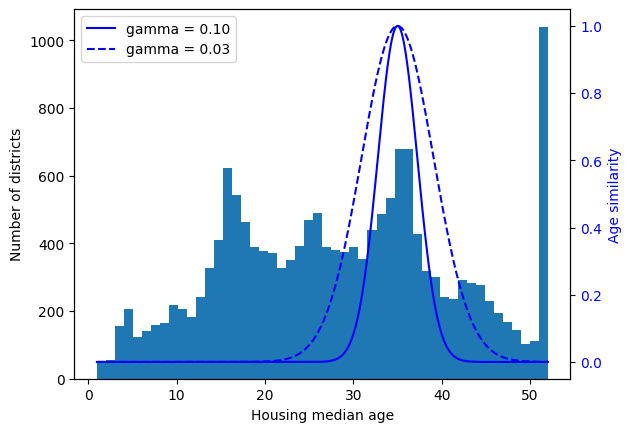

In [73]:
ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
plt.show()

In [62]:
# if targets transformed, may need to use specialized versions to train on
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5] # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)
predictions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

In [65]:
# simpler version  of above
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

In [67]:
# Sometimes we need custom transformers, here we do it for population
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

In [68]:
# custom transformer with RBF
rbf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

In [70]:
# rbf with 2 features measures distance in 2D using Euclidean distance

sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])
sf_simil

array([[0.999927  ],
       [0.05258419],
       [0.94864161],
       ...,
       [0.00388525],
       [0.05038518],
       [0.99868067]], shape=(16512, 1))

In [71]:
# can also compute ratio between two or more features
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1.,2.], [3.,4.]]))

array([[0.5 ],
       [0.75]])

In [76]:
# to have a transformer that is trainable we need to make a class with fit() transform() and fit_transform()
# fit_transform() is in base class TransformerMixin
# BaseEstimator also gives get_params and set_params

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):
        self.with_mean = with_mean

    def fit(self, X, y=None):
        X = check_array(X) # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1] # every estimator stores this in fit()
        return self

    def transform(self, X):
        check_is_fitted(self) # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X=X - self.mean_
        return X/ self.scale_

In [77]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [79]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],sample_weight=housing_labels)

In [80]:
similarities[:3].round(2)

array([[0.08, 0.  , 0.6 , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.14],
       [0.  , 0.99, 0.  , 0.04, 0.  , 0.  , 0.11, 0.  , 0.63, 0.  ],
       [0.44, 0.  , 0.3 , 0.  , 0.  , 0.7 , 0.  , 0.01, 0.  , 0.29]])

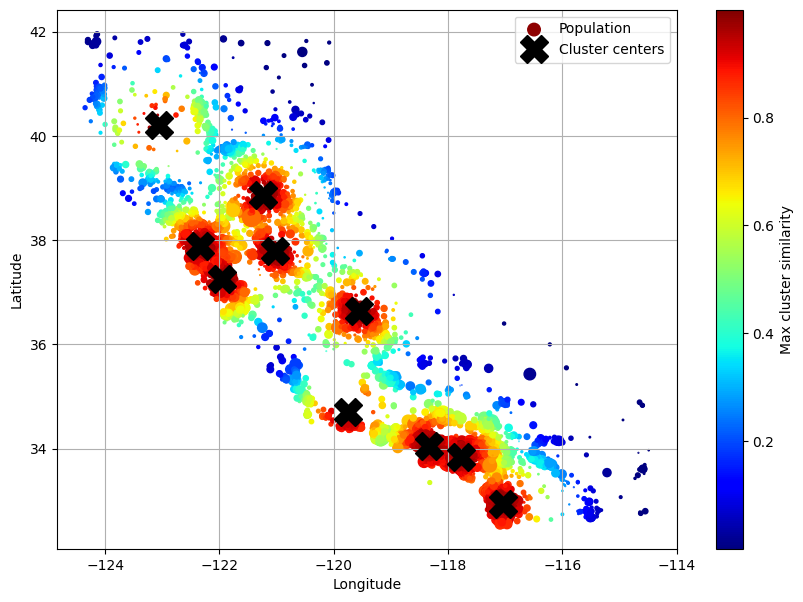

In [81]:
housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
plt.show()

In [83]:
# transformations steps are numerous, and need to happen in correct order
# we can use sklearn pipelines to handle this
# here is small example on numerical attributes

from sklearn.pipeline import Pipeline
import sklearn
sklearn.set_config(display="diagram")

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler())
])

num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

In [85]:
# to not name the transformers, use make_pipeline

from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [86]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [89]:
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared,
    columns = num_pipeline.get_feature_names_out(),
    index=housing_num.index
)

df_housing_num_prepared.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096  -1.423037  1.013606            1.861119     0.311912        1.368167   
14973   0.596394 -0.702103            0.907630    -0.308620       -0.435925   
3785   -1.203098  1.276119            0.351428    -0.712240       -0.760709   
14689   1.231216 -0.884924           -0.919891     0.702262        0.742306   
20507   0.711362 -0.875549            0.589800     0.790125        1.595753   

       population  households  median_income  
13096    0.137460    1.394812      -0.936491  
14973   -0.693771   -0.373485       1.171942  
3785    -0.788768   -0.775727      -0.759789  
14689    0.383175    0.731375      -0.850281  
20507    0.444376    1.755263      -0.180365

In [90]:
# we have now handled categorical and numerical columns, now we can handle together with ColumnTransformer

from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [91]:
# makes pipeline based on column type instead of name
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [92]:
# apply pipeline to housing data
housing_prepared = preprocessing.fit_transform(housing)

In [93]:
# final pipeline that does everything weve gone over so far above
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [94]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 24)

In [95]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

In [96]:
# now we are done preprocessing and can train the model

### Begin Training Models

In [97]:
# simple linear regression
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7f4...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f456845c880>)])),
                ('linearregression', LinearRegression())])

In [ ]:
# make predictions with linear regression model and compare to labels

In [99]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)

array([242800., 375900., 127500.,  99400., 324600.])

In [100]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

In [105]:
# use RMSE to calculate performance
try:
    from sklearn.metrics import root_mean_squared_error
except ImportError:
    from sklearn.metrics import mean_squared_error

    def root_mean_squared_error(labels, predictions):
        return mean_squared_error(labels, predictions, squared=False)

lin_rmse = root_mean_squared_error(housing_labels, housing_predictions)
lin_rmse

68647.95686706669

In [107]:
# $68,647 Off of price, this is bad
# this is underfitting so either the features are not providing enough information or the model is not powerful enough

# Try DecisionTreeREgressor since it is a more powerful model

from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7f4...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f456845c880>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [108]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = root_mean_squared_error(housing_labels, housing_predictions)
tree_rmse

0.0

In [ ]:
# this is weird, the model had 0 error? it could have badly overfitted the data.  We dont want to touch the test set until you are ready to launch a model we are confident about,
# we can use part of the training set for training and poart of it for model validation

In [110]:
# we can use cross_val_score - splits data into 10 non overlapping subsets (folds)
# then trains and evaluates the model 10 times picking a different fold for each evaluation and the other 9 folds for training
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels, scoring='neg_root_mean_squared_error', cv=10)
pd.Series(tree_rmses).describe()

count       10.000000
mean     66366.983603
std       1976.844743
min      63557.655007
25%      65004.623899
50%      65886.897085
75%      68129.026040
max      69530.301101
dtype: float64

In [ ]:
# decision tree still isnt doing to well, on avg is off by $66,366
# we know this is overfitting since the training error was 0 but the cross_val is still showing high error

In [111]:
# Trying with RandomForrest Models
# train many decision tree models on random subsets of the features then averaging out their prefictions. 
# models made up of other models are called ensembles
# can boost performance of the underlying model

from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [112]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     46938.209246
std       1018.397196
min      45522.649195
25%      46291.334639
50%      47021.703303
75%      47321.521991
max      49140.832210
dtype: float64

In [ ]:
# this is alot better then what we tried before
# the rmse is roughly 17,474 which indicates alot of overfitting still
# possible solutions are to simplify the model, constrain or regularize it, or get a lot more training data
# before diving deeper, try more models from various ccategories, without tweaking hyperparameters to get shortlist of models